# Does the weather affect the delay?

Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

- sunny
- cloudy
- rainy
- snow.

Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?


Weather data retrieved from worldweatheronline.com. See [Task 3 - Weather Prepwork](Task%203%20-%20Weather%20Prepwork.ipynb) for the details on working with the API and preparing the sample dataset.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats


In [88]:
# retrieving sample dataset

df = pd.read_csv('task3_weather_df.csv')
df.head()

,fl_date,origin_city_name,dest_city_name,crs_dep_time,delay,crs_arr_time,weather_delay,dep_hour,arr_hour,weather
0,2018-07-14,"Atlanta, GA","Austin, TX",1730,92.0,1850,56.0,17,18,Rainy
1,2018-07-14,"Atlanta, GA","Jacksonville, FL",1710,72.0,1825,57.0,17,18,Rainy
2,2018-07-14,"Atlanta, GA","Las Vegas, NV",1740,39.0,1855,37.0,17,19,Rainy
3,2018-07-14,"Atlanta, GA","Tampa, FL",1715,73.0,1845,69.0,17,18,Rainy
4,2018-07-14,"Atlanta, GA","Phoenix, AZ",1802,80.0,1902,5.0,18,19,Rainy


In [89]:
df['weather'].value_counts()

Rainy     23471
Cloudy    13974
Sunny     10052
Snow       1532
Name: weather, dtype: int64

In [85]:
sunny_df = df[df['weather'] =='Sunny']['delay']
cloudy_df = df[df['weather'] =='Cloudy']['delay']
rainy_df = df[df['weather'] =='Rainy']['delay']
snow_df = df[df['weather'] =='Snow']['delay']

In [71]:
sunny_df

299       27.0
300       32.0
301       35.0
302        3.0
303       37.0
         ...  
48863      7.0
48864    161.0
48865    134.0
48866     22.0
48867      2.0
Name: weather_delay, Length: 10052, dtype: float64

## Visualizing the distributions

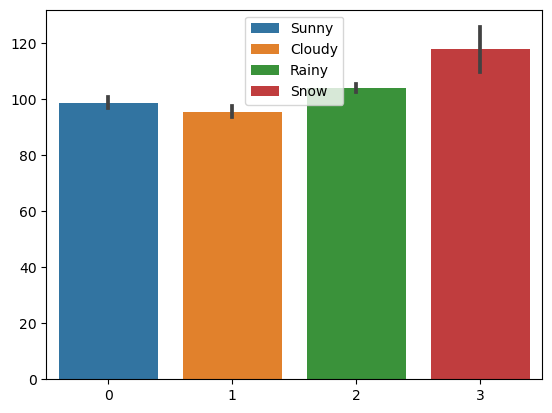

In [41]:
ax = sns.barplot([sunny_df, cloudy_df, rainy_df, snow_df], label = ['Sunny', 'Cloudy', 'Rainy', 'Snow'])
plt.legend(loc='upper center')
plt.show()


## Running the statistics tests

To test if they are from the same distribution, we will check if they have equal means and variances. 

The Ttest has the following hypotheses:
- H<sub>0</sub>: means are equal
- H<sub>a</sub>: means are probably not equal

The Levene's test has the following hypotheses:
- H<sub>0</sub>: variances are equal
- H<sub>a</sub>: variances are probably not equal

In [78]:
def stats_tests(df1, df2):

    # Levene's test for equal variances
    stat, p = stats.levene(df1, df2)
    print ('The variances are probably',
           'equal.' if p>0.05 else 'not equal.')

    stat, p = stats.ttest_ind(df1, df2, equal_var=False)
    print ('The means are probably',
           'equal.' if p>0.05 else 'not equal.')

In [79]:
stats_tests(sunny_df, cloudy_df)

The variances are probably equal.
The means are probably equal.


In [80]:
stats_tests(sunny_df, snow_df)

The variances are probably not equal.
The means are probably not equal.


In [81]:
stats_tests(sunny_df, rainy_df)

The variances are probably not equal.
The means are probably not equal.


In [82]:
stats_tests(cloudy_df, snow_df)

The variances are probably not equal.
The means are probably not equal.


In [86]:
stats_tests(cloudy_df, rainy_df)

The variances are probably not equal.
The means are probably not equal.


In [87]:
stats_tests(snow_df, rainy_df)

The variances are probably not equal.
The means are probably not equal.


## Conclusion:

Based on these results, the **Sunny** and **Cloudy** are probably from the same distribution but the distributions of **Snow** and **Rainy** are significantly different."